In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
def parse_trace(path, line_of_file, T_grid):
    """
    0:Ef[Ry], 1:T[K], 2:N ,3:DOS(Ef) ,4:S ,  5:s/t , 6:R_H, 7:kappa0 , 8:c, 9:chi
    return the data matrix of dimension(10, line_of_file/T_grid, T_grid) 
    -----------------------------------
    --when plot, use(property, :, T)---
    -----------------------------------
    path: path of *.trace file
    line_of_file: data points(number of line) of *.trace file
    T_grid: number of Temperature
    """
    data = np.zeros((10, line_of_file))
    with open(path,'r') as f:
        i = 0
        for line in f:
            if not line.startswith('#'):
                data[0, i] = float(line.split()[0])*13.605698066
                for j in range(1, 10):
                    data[j, i] = float(line.split()[j])
                i = i+1
    new_data = data.reshape((10, line_of_file/T_grid, T_grid))
    return new_data




//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


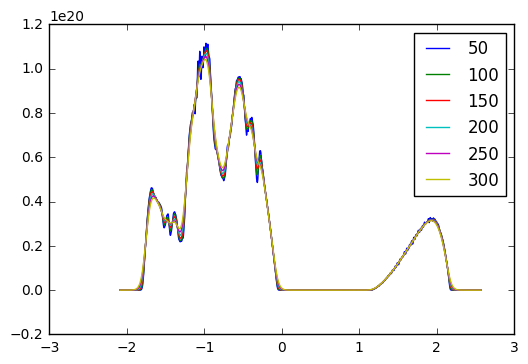

In [112]:
path = '/Users/yao/Google Drive/data/216/Cs2Sn1I6/BoltzTrap-k-test/k19/boltztrap/boltztrap.trace'
line_of_file = 5604
T_grid = 6
data=parse_trace(path=path, line_of_file=line_of_file, T_grid=T_grid)

#plot Temperature dependence
for i in range(T_grid):
    plt.plot(data[0, :, i], data[5, :, i], label=str((i+1)*50))
plt.legend()
plt.show()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


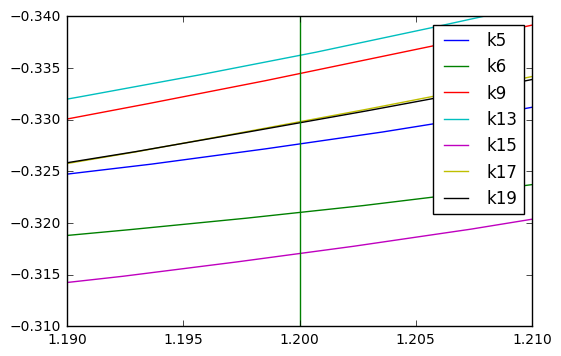

In [27]:
#plot k-convergence of effective masses
line_of_file = 5604
T_grid = 6
cell_volume= 439e-30
e = 1.60217662e-19 

for i in [5, 6, 9,13, 15,17,19]:
#for i in [19, 23, 27, 30]:
    path = '/Users/yao/Google Drive/data/216/Cs2Sn1I6/BoltzTrap-k-test/k'+str(i)+'/boltztrap/boltztrap.trace'
    data=parse_trace(path=path, line_of_file=line_of_file, T_grid=T_grid)
    T=300
    T_point=T/50.0-1
    constant = e**2/cell_volume/(9.10938356e-31)
    plt.plot(data[0, :, T_point], constant*data[2, :, T_point]/data[5, :, T_point], label='k'+str(i))
plt.ylim(-0.31,-0.34)
plt.xlim(1.19,1.21)
#plt.ylim(1.50,1.504)
#plt.xlim(-0.01,0.01)
#plt.ylim(-10,10)
#plt.xlim(-0.2,1.4)
plt.plot([0,0],[-100,100])
plt.plot([1.2,1.2],[-100,100])
plt.legend()
plt.show()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


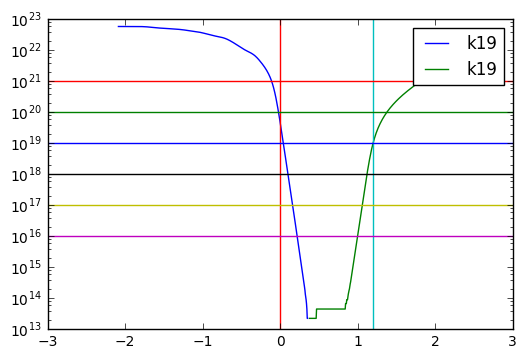

In [199]:
#plot doping
line_of_file = 5604
T_grid = 6
cell_volume= 439e-30

#for i in [5,6,9,13,15,17,19]:
for i in [19]:
    path = '/Users/yao/Google Drive/data/216/Cs2Sn1I6/BoltzTrap-k-test/k'+str(i)+'/boltztrap/boltztrap.trace'
    data=parse_trace(path=path, line_of_file=line_of_file, T_grid=T_grid)
    T=300
    T_point=T/50.0-1
    plt.semilogy(data[0, :, T_point], data[2, :, T_point]*1e-6/cell_volume, label='k'+str(i))
    plt.semilogy(data[0, :, T_point], -data[2, :, T_point]*1e-6/cell_volume, label='k'+str(i))
plt.plot([0,0],[1e13,1e23])
plt.plot([1.2,1.2],[1e13,1e23])

plt.plot([-3,3],[1e16, 1e16])
plt.plot([-3,3],[1e17, 1e17])
plt.plot([-3,3],[1e18, 1e18])
plt.plot([-3,3],[1e19, 1e19])
plt.plot([-3,3],[1e20, 1e20])
plt.plot([-3,3],[1e21, 1e21])

#plt.xlim([1.0,1.4])
plt.legend()
plt.show()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


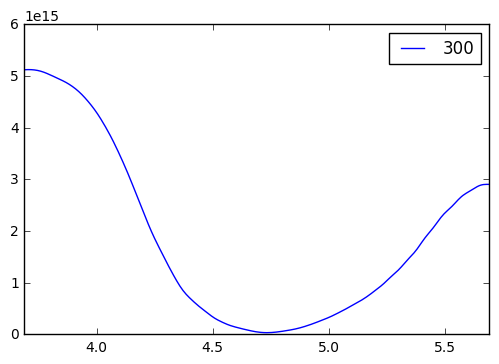

In [109]:
##testing the Bi2Te3 example on the paper
path='/Users/yao/Bi2Te3.trace'
line_of_file = 9873-1
T_grid = 16
data=parse_trace(path=path, line_of_file=line_of_file, T_grid=T_grid)

#plot Temperature dependence
for i in range(T_grid):
    if i == 5:
        plt.plot(data[0, :, i], data[7, :, i], label=str((i+1)*50))
plt.legend()
plt.xlim(3.69, 5.69)
#plt.ylim(-300,300)
plt.show()

1.95